In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import mglearn
from sklearn.model_selection import train_test_split

C:\Users\songlk2\AppData\Local\Temp\ipykernel_14552\2124025908.py:3: DeprecationWarning: 
Pyarrow will become a required dependency of pandas in the next major release of pandas (pandas 3.0),
(to allow more performant data types, such as the Arrow string type, and better interoperability with other libraries)
but was not found to be installed on your system.
If this would cause problems for you,
please provide us feedback at https://github.com/pandas-dev/pandas/issues/54466
        
  import pandas as pd


In [2]:
"""
    集成（ensemble）是合并多个机器学习模型来构建更强大模型的方法。
    在机器学习文献中有许多模型都属于这一类，但已证明有两种集成模型对大量分类和回归的数据集都是有效的，
    二者都以决策树为基础，分别是
        随机森林（random forest）
        梯度提升决策树（gradient boosted decision tree）。
"""

'\n    集成（ensemble）是合并多个机器学习模型来构建更强大模型的方法。\n    在机器学习文献中有许多模型都属于这一类，但已证明有两种集成模型对大量分类和回归的数据集都是有效的，\n    二者都以决策树为基础，分别是\n        随机森林（random forest）\n        梯度提升决策树（gradient boosted decision tree）。\n'

In [3]:
"""
    1. 随机森林
    我们刚刚说过，决策树的一个主要缺点在于经常对训练数据过拟合。
    随机森林是解决这个问题的一种方法。
    
    随机森林本质上是许多决策树的集合，其中每棵树都和其他树略有不同。
    随机森林背后的思想是，每棵树的预测可能都相对较好，但可能对部分数据过拟合。
    
    如果构造很多树，并且每棵树的预测都很好，但都以不同的方式过拟合，那么我们可以对这些树的结果取平均值来降低过拟合。
    既能减少过拟合又能保持树的预测能力，这可以在数学上严格证明。
    
    为了实现这一策略，我们需要构造许多决策树。
    每棵树都应该对目标值做出可以接受的预测，还应该与其他树不同。
    随机森林的名字来自于将随机性添加到树的构造过程中，以确保每棵树都各不相同。
    随机森林中树的随机化方法有两种：
        一种是通过选择用于构造树的数据点,
        另一种是通过选择每次划分测试的特征。
        我们来更深入地研究这一过程。
"""

'\n    1. 随机森林\n    我们刚刚说过，决策树的一个主要缺点在于经常对训练数据过拟合。\n    随机森林是解决这个问题的一种方法。\n    随机森林本质上是许多决策树的集合，其中每棵树都和其他树略有不同。\n    随机森林背后的思想是，每棵树的预测可能都相对较好，但可能对部分数据过拟合。\n    \n    如果构造很多树，并且每棵树的预测都很好，但都以不同的方式过拟合，那么我们可以对这些树的结果取平均值来降低过拟合。\n    既能减少过拟合又能保持树的预测能力，这可以在数学上严格证明。\n    \n    为了实现这一策略，我们需要构造许多决策树。每棵树都应该对目标值做出可以接受的预测，还应该与其他树不同。\n    随机森林的名字来自于将随机性添加到树的构造过程中，以确保每棵树都各不相同。\n    随机森林中树的随机化方法有两种：\n        一种是通过选择用于构造树的数据点,\n        另一种是通过选择每次划分测试的特征。\n        我们来更深入地研究这一过程。\n'

In [4]:
"""
    构造随机森林。 
        想要 构 造 一 个 随 机 森 林 模 型， 你 需 要 确 定 用 于 构 造 的 树 的 个 数
        （RandomForestRegressor 或 RandomForestClassifier 的 n_estimators 参数）。
        比如我们想要构造 10 棵树。
        
        这些树在构造时彼此完全独立，算法对每棵树进行不同的随机选择，以确保树和树之间是有区别的。
        想要构造一棵树，首先要对数据进行自助采样（bootstrap sample）。
        也就是说，从 n_samples 个数据点中有放回地（即同一样本可以被多次抽取）重复随机抽取一个样本，共抽取 n_samples 次。
        这样会创建一个与原数据集大小相同的数据集，但有些数据点会缺失（大约三分之一），有些会重复。
        
        举例说明，比如我们想要创建列表 ['a', 'b', 'c', 'd'] 的自助采样。一种可能的自主采样是 ['b', 'd', 'd', 'c']，另一种可能的采样为 ['d', 'a', 'd', 'a']。
        
        接下来，基于这个新创建的数据集来构造决策树。
        但是，要对我们在介绍决策树时描述的算法稍作修改。
        在每个结点处，算法随机选择特征的一个子集，并对其中一个特征寻找最佳测试，而不是对每个结点都寻找最佳测试。
        
        选择的特征个数由 max_features 参数来控制。
        每个结点中特征子集的选择是相互独立的，这样树的每个结点可以使用特征的不同子集来做出决策。
    
    由于使用了自助采样，随机森林中构造每棵决策树的数据集都是略有不同的。
    由于每个结点的特征选择，每棵树中的每次划分都是基于特征的不同子集。
    这两种方法共同保证随机森林中所有树都不相同。
    
    在这个过程中的一个关键参数是 max_features。
    
    如果我们设置 max_features 等于n_features，那么每次划分都要考虑数据集的所有特征，在特征选择的过程中没有添加随机性（不过自助采样依然存在随机性）。
    如果设置 max_features 等于 1，那么在划分时将无法选择对哪个特征进行测试，只能对随机选择的某个特征搜索不同的阈值。
    
    因此，如果 max_features 较大，那么随机森林中的树将会十分相似，利用最独特的特征可以轻松拟合数据。
    如果 max_features 较小，那么随机森林中的树将会差异很大，为了很好地拟合数据，每棵树的深度都要很大。
"""

"\n    构造随机森林。 \n        想要 构 造 一 个 随 机 森 林 模 型， 你 需 要 确 定 用 于 构 造 的 树 的 个 数\n        （RandomForestRegressor 或 RandomForestClassifier 的 n_estimators 参数）。\n        比如我们想要构造 10 棵树。\n        \n        这些树在构造时彼此完全独立，算法对每棵树进行不同的随机选择，以确保树和树之间是有区别的。\n        想要构造一棵树，首先要对数据进行自助采样（bootstrap sample）。\n        也就是说，从 n_samples 个数据点中有放回地（即同一样本可以被多次抽取）重复随机抽取一个样本，共抽取 n_samples 次。\n        这样会创建一个与原数据集大小相同的数据集，但有些数据点会缺失（大约三分之一），有些会重复。\n        举例说明，比如我们想要创建列表 ['a', 'b', 'c', 'd'] 的自助采样。一种可能的自主采样是 ['b', 'd', 'd', 'c']，另一种可能的采样为 ['d', 'a', 'd', 'a']。\n        \n        接下来，基于这个新创建的数据集来构造决策树。\n        但是，要对我们在介绍决策树时描述的算法稍作修改。\n        在每个结点处，算法随机选择特征的一个子集，并对其中一个特征寻找最佳测试，而不是对每个结点都寻找最佳测试。\n        选择的特征个数由 max_features 参数来控制。\n        每个结点中特征子集的选择是相互独立的，这样树的每个结点可以使用特征的不同子集来做出决策。\n    \n    由于使用了自助采样，随机森林中构造每棵决策树的数据集都是略有不同的。\n    由于每个结点的特征选择，每棵树中的每次划分都是基于特征的不同子集。\n    这两种方法共同保证随机森林中所有树都不相同。\n    \n    在这个过程中的一个关键参数是 max_features。\n    如果我们设置 max_features 等于n_features，那么每次划分都要考虑数据集的所有特征，在特征选择的过程中没有添加随机性（不过自

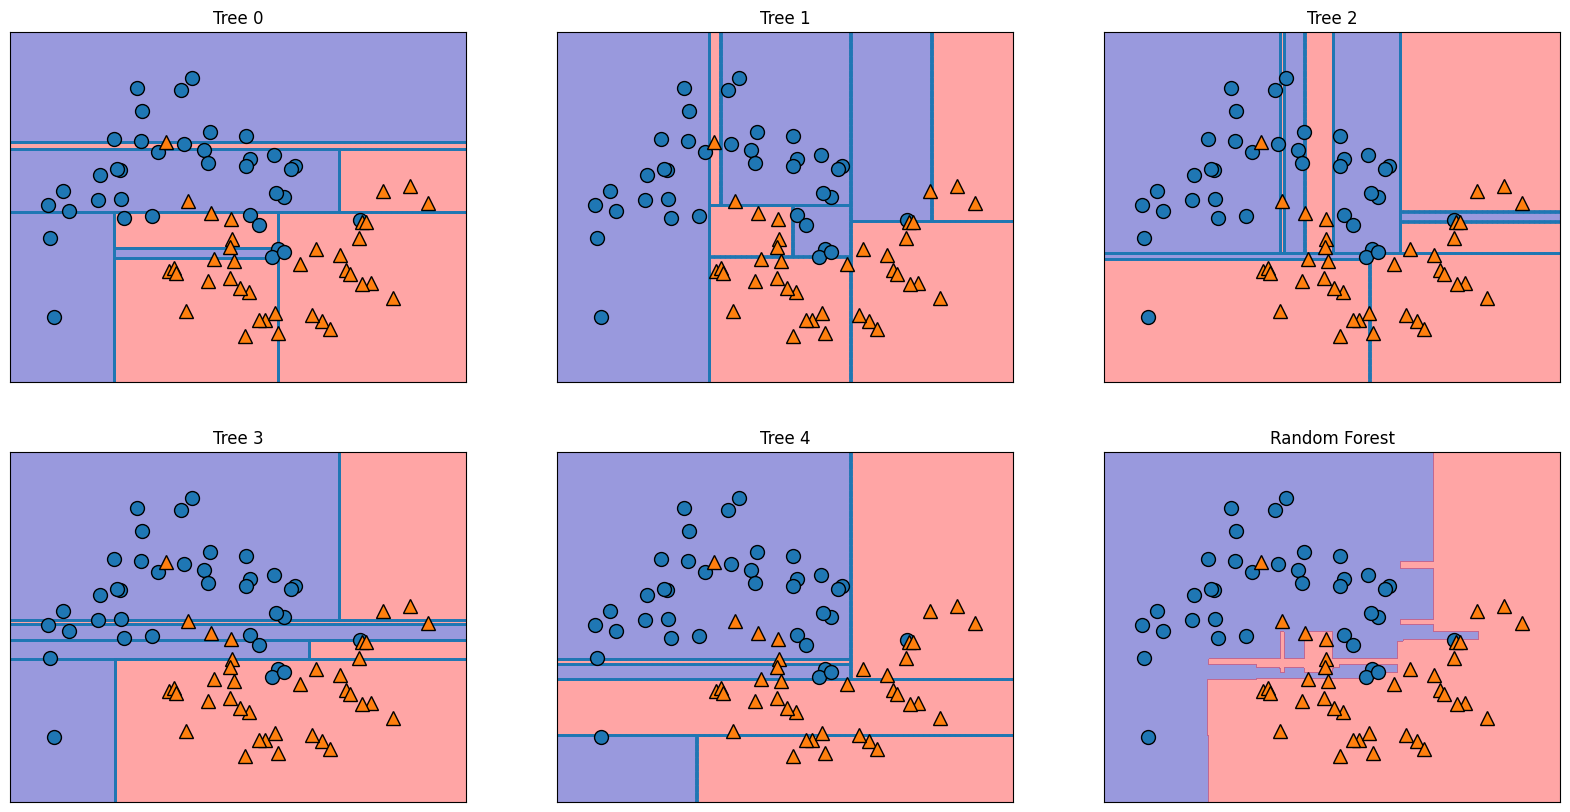

In [5]:
"""
    想要利用随机森林进行预测，算法首先对森林中的每棵树进行预测。
        对于回归问题，我们可以对这些结果取平均值作为最终预测。
        对于分类问题，则用到了“软投票”（soft voting）策略。
    也就是说，每个算法做出“软”预测，给出每个可能的输出标签的概率。
    对所有树的预测概率取平均值，然后将概率最大的类别作为预测结果。
    分析随机森林。
        下面将由 5 棵树组成的随机森林应用到前面研究过的 two_moons 数据集上：
"""
from sklearn.ensemble import RandomForestClassifier
from sklearn.datasets import make_moons

X, y = make_moons(n_samples=100, noise=0.25, random_state=3)
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y,
                                                    random_state=42)
forest = RandomForestClassifier(n_estimators=5, random_state=2)
forest.fit(X_train, y_train)
"""
    作为随机森林的一部分，树被保存在 estimator_ 属性中。
    我们将每棵树学到的决策边界可视化，也将它们的总预测（即整个森林做出的预测）可视化（图 2-33）：
"""
fig, axes = plt.subplots(2, 3, figsize=(20, 10))
for i, (ax, tree) in enumerate(zip(axes.ravel(), forest.estimators_)):
    ax.set_title("Tree {}".format(i))
    mglearn.plots.plot_tree_partition(X_train, y_train, tree, ax=ax)
mglearn.plots.plot_2d_separator(forest, X_train, fill=True, ax=axes[-1, -1], alpha=.4)
axes[-1, -1].set_title("Random Forest")
mglearn.discrete_scatter(X_train[:, 0], X_train[:, 1], y_train)

Accuracy on training set: 1.000
Accuracy on test set: 0.972


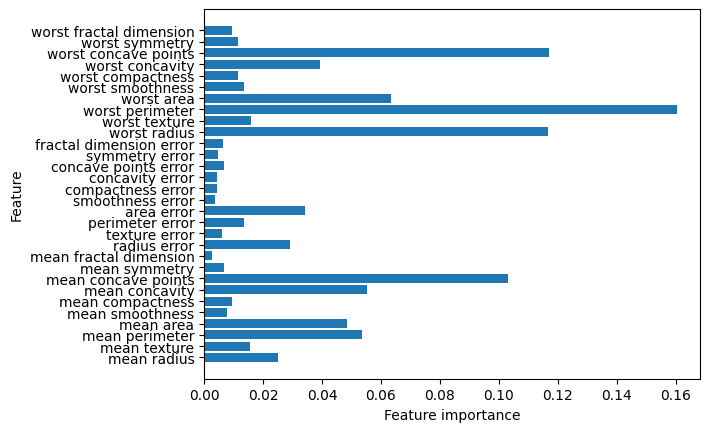

In [6]:
"""
    你可以清楚地看到，这 5 棵树学到的决策边界大不相同。
    每棵树都犯了一些错误，因为这里画出的一些训练点实际上并没有包含在这些树的训练集中，原因在于自助采样。
    
    随机森林比单独每一棵树的过拟合都要小，给出的决策边界也更符合直觉。
    在任何实际应用中，我们会用到更多棵树（通常是几百或上千），从而得到更平滑的边界。
    再举一个例子，我们将包含 100 棵树的随机森林应用在乳腺癌数据集上：
"""
from sklearn.datasets import load_breast_cancer
cancer = load_breast_cancer()
X_train, X_test, y_train, y_test = train_test_split(cancer.data, cancer.target, random_state=0)
forest = RandomForestClassifier(n_estimators=100, random_state=0)
forest.fit(X_train, y_train)
print("Accuracy on training set: {:.3f}".format(forest.score(X_train, y_train)))
print("Accuracy on test set: {:.3f}".format(forest.score(X_test, y_test)))
"""
    在没有调节任何参数的情况下，随机森林的精度为 97%，比线性模型或单棵决策树都要好。
    我们可以调节 max_features 参数，或者像单棵决策树那样进行预剪枝。
    但是，随机森林的默认参数通常就已经可以给出很好的结果。
    
    与决策树类似，随机森林也可以给出特征重要性，计算方法是将森林中所有树的特征重要性求和并取平均。
    一般来说，随机森林给出的特征重要性要比单棵树给出的更为可靠。
"""
def plot_feature_importances_cancer(model):
    n_features = cancer.data.shape[1]
    plt.barh(range(n_features), model.feature_importances_, align='center')
    plt.yticks(np.arange(n_features), cancer.feature_names)
    plt.xlabel("Feature importance")
    plt.ylabel("Feature")
plot_feature_importances_cancer(forest)

In [7]:
"""
    如你所见，与单棵树相比，随机森林中有更多特征的重要性不为零。
    与单棵决策树类似，随机森林也给了“worst radius”（最大半径）特征很大的重要性，但从总体来看，它实际上却选择“worst perimeter”（最大周长）作为信息量最大的特征。
    由于构造随机森林过程中的随机性，算法需要考虑多种可能的解释，结果就是随机森林比单棵树更能从总体把握数据的特征。
"""
"""
    优点、缺点和参数。
    
    用于回归和分类的随机森林是目前应用最广泛的机器学习方法之一。
    这种方法非常强大，通常不需要反复调节参数就可以给出很好的结果，也不需要对数据进行缩放。
    
    从本质上看，随机森林拥有决策树的所有优点，同时弥补了决策树的一些缺陷。
    仍然使用决策树的一个原因是需要决策过程的紧凑表示。
    基本上不可能对几十棵甚至上百棵树做出详细解释，随机森林中树的深度往往比决策树还要大（因为用到了特征子集）。
    因此，如果你需要以可视化的方式向非专家总结预测过程，那么选择单棵决策树可能更好。
    
    虽然在大型数据集上构建随机森林可能比较费时间，但在一台计算机的多个 CPU 内核上并行计算也很容易。
    如果你用的是多核处理器（几乎所有的现代化计算机都是），你可以用 n_jobs 参数来调节使用的内核个数。
    使用更多的 CPU 内核，可以让速度线性增加（使用 2 个内核，随机森林的训练速度会加倍），但设置 n_jobs 大于内核个数是没有用的。
    你可以设置 n_jobs=-1 来使用计算机的所有内核。
    
    你应该记住，随机森林本质上是随机的，设置不同的随机状态（或者不设置 random_state参数）可以彻底改变构建的模型。
    森林中的树越多，它对随机状态选择的鲁棒性就越好。
    
    如果你希望结果可以重现，固定 random_state 是很重要的。
    对于维度非常高的稀疏数据（比如文本数据），随机森林的表现往往不是很好。
    对于这种数据，使用线性模型可能更合适。
    即使是非常大的数据集，随机森林的表现通常也很好，训练过程很容易并行在功能强大的计算机的多个 CPU 内核上。
    不过，随机森林需要更大的内存，训练和预测的速度也比线性模型要慢。
    对一个应用来说，如果时间和内存很重要的话，那么换用线性模型可能更为明智。
    需要调节的重要参数有 n_estimators 和 max_features，可能还包括预剪枝选项（如 max_depth）。
    n_estimators 总是越大越好。
    对更多的树取平均可以降低过拟合，从而得到鲁棒性更好的集成。
    
    不过收益是递减的，而且树越多需要的内存也越多，训练时间也越长。
    常用的经验法则就是“在你的时间 / 内存允许的情况下尽量多”。
    
    前面说过，max_features 决定每棵树的随机性大小，较小的 max_features 可以降低过拟合。
    
    一般来说，好的经验就是使用默认值：对于分类，默认值是 max_features=sqrt(n_features)；对于回归，默认值是 max_features=n_features。
    增大 max_features 或 max_leaf_nodes 有时也可以提高性能。
    它还可以大大降低用于训练和预测的时间和空间要求。
"""

'\n    优点、缺点和参数。\n    \n    用于回归和分类的随机森林是目前应用最广泛的机器学习方法之一。\n    这种方法非常强大，通常不需要反复调节参数就可以给出很好的结果，也不需要对数据进行缩放。\n    \n    从本质上看，随机森林拥有决策树的所有优点，同时弥补了决策树的一些缺陷。\n    仍然使用决策树的一个原因是需要决策过程的紧凑表示。\n    基本上不可能对几十棵甚至上百棵树做出详细解释，随机森林中树的深度往往比决策树还要大（因为用到了特征子集）。\n    因此，如果你需要以可视化的方式向非专家总结预测过程，那么选择单棵决策树可能更好。\n    \n    虽然在大型数据集上构建随机森林可能比较费时间，但在一台计算机的多个 CPU 内核上并行计算也很容易。\n    如果你用的是多核处理器（几乎所有的现代化计算机都是），你可以用 n_jobs 参数来调节使用的内核个数。\n    使用更多的 CPU 内核，可以让速度线性增加（使用 2 个内核，随机森林的训练速度会加倍），但设置 n_jobs 大于内核个数是没有用的。\n    你可以设置 n_jobs=-1 来使用计算机的所有内核。\n    \n    你应该记住，随机森林本质上是随机的，设置不同的随机状态（或者不设置 random_state参数）可以彻底改变构建的模型。\n    森林中的树越多，它对随机状态选择的鲁棒性就越好。\n    \n    如果你希望结果可以重现，固定 random_state 是很重要的。\n    对于维度非常高的稀疏数据（比如文本数据），随机森林的表现往往不是很好。\n    对于这种数据，使用线性模型可能更合适。\n    即使是非常大的数据集，随机森林的表现通常也很好，训练过程很容易并行在功能强大的计算机的多个 CPU 内核上。\n    不过，随机森林需要更大的内存，训练和预测的速度也比线性模型要慢。\n    对一个应用来说，如果时间和内存很重要的话，那么换用线性模型可能更为明智。\n    需要调节的重要参数有 n_estimators 和 max_features，可能还包括预剪枝选项（如 max_depth）。\n    n_estimators 总是越大越好。\n    对更多的树取平均可以降低过拟合，从而得到鲁棒性更好

In [14]:
"""
    2. 梯度提升回归树（梯度提升机）
    梯度提升回归树是另一种集成方法，通过合并多个决策树来构建一个更为强大的模型。
    虽然名字中含有“回归”，但这个模型既可以用于回归也可以用于分类。
    
    与随机森林方法不同，梯度提升采用连续的方式构造树，每棵树都试图纠正前一棵树的错误。
    默认情况下，梯度提升回归树中没有随机化，而是用到了强预剪枝。
    梯度提升树通常使用深度很小（1到 5 之间）的树，这样模型占用的内存更少，预测速度也更快。
    
    梯度提升背后的主要思想是合并许多简单的模型（在这个语境中叫作弱学习器），比如深度较小的树。
    每棵树只能对部分数据做出好的预测，因此，添加的树越来越多，可以不断迭代提高性能。
    
    梯度提升树经常是机器学习竞赛的优胜者，并且广泛应用于业界。
    与随机森林相比，它通常对参数设置更为敏感，但如果参数设置正确的话，模型精度更高。
    除了预剪枝与集成中树的数量之外，梯度提升的另一个重要参数是 learning_rate（学习率），用于控制每棵树纠正前一棵树的错误的强度。
    
    较高的学习率意味着每棵树都可以做出较强的修正，这样模型更为复杂。
    通过增大 n_estimators 来向集成中添加更多树，也可以增加模型复杂度，因为模型有更多机会纠正训练集上的错误。
    
    下面是在乳腺癌数据集上应用 GradientBoostingClassifier 的示例。
    默认使用 100 棵树，最大深度是 3，学习率为 0.1：
"""
from sklearn.ensemble import GradientBoostingClassifier
X_train, X_test, y_train, y_test = train_test_split(
 cancer.data, cancer.target, random_state=0)
gbrt = GradientBoostingClassifier(random_state=0)
gbrt.fit(X_train, y_train)
print("Accuracy on training set: {:.3f}".format(gbrt.score(X_train, y_train)))
print("Accuracy on test set: {:.3f}".format(gbrt.score(X_test, y_test)))


Accuracy on training set: 1.000
Accuracy on test set: 0.965


In [13]:
"""
    由于训练集精度达到 100%，所以很可能存在过拟合。
    为了降低过拟合，我们可以限制最大深度来加强预剪枝，也可以降低学习率：
"""
gbrt = GradientBoostingClassifier(random_state=0, max_depth=1)
gbrt.fit(X_train, y_train)
print("Accuracy on training set: {:.3f}".format(gbrt.score(X_train, y_train)))
print("Accuracy on test set: {:.3f}".format(gbrt.score(X_test, y_test)))

gbrt = GradientBoostingClassifier(random_state=0, learning_rate=0.01)
gbrt.fit(X_train, y_train)
print("Accuracy on training set: {:.3f}".format(gbrt.score(X_train, y_train)))
print("Accuracy on test set: {:.3f}".format(gbrt.score(X_test, y_test)))

Accuracy on training set: 0.991
Accuracy on test set: 0.972
Accuracy on training set: 0.988
Accuracy on test set: 0.958


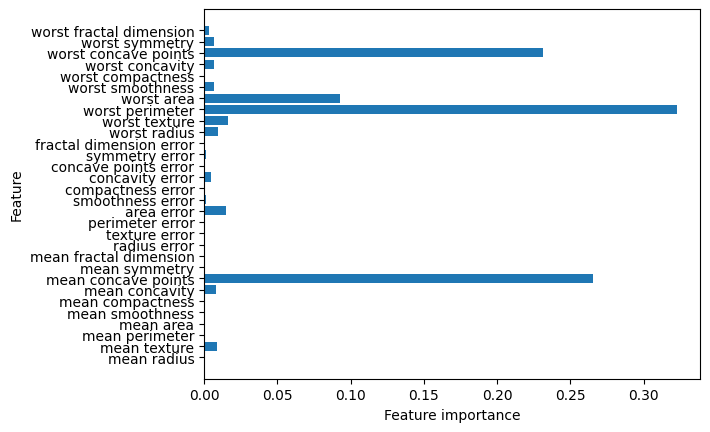

In [11]:
"""
    降低模型复杂度的两种方法都降低了训练集精度，这和预期相同。
    
    在这个例子中，减小树的最大深度显著提升了模型性能，而降低学习率仅稍稍提高了泛化性能。
    对于其他基于决策树的模型，我们也可以将特征重要性可视化，以便更好地理解模型（图 2-35）。
    由于我们用到了 100 棵树，所以即使所有树的深度都是 1，查看所有树也是不现实的：
"""
gbrt = GradientBoostingClassifier(random_state=0, max_depth=1)
gbrt.fit(X_train, y_train)
plot_feature_importances_cancer(gbrt)

In [ ]:
"""
    可以看到，梯度提升树的特征重要性与随机森林的特征重要性有些类似，不过梯度提升完全忽略了某些特征。
    由于梯度提升和随机森林两种方法在类似的数据上表现得都很好，因此一种常用的方法就是先尝试随机森林，它的鲁棒性很好。
    
    如果随机森林效果很好，但预测时间太长，或者机器学习模型精度小数点后第二位的提高也很重要，那么切换成梯度提升通常会有用。
    
    如果你想要将梯度提升应用在大规模问题上，可以研究一下 xgboost 包及其 Python 接口，在写作本书时，这个库在许多数据集上的速度都比 scikit-learn 对梯度提升的实现要快（有时调参也更简单）。
"""

In [ ]:
"""
    优点、缺点和参数。
    梯度提升决策树是监督学习中最强大也最常用的模型之一。
    其主要缺点是需要仔细调参，而且训练时间可能会比较长。
    
    与其他基于树的模型类似，这一算法不需要对数据进行缩放就可以表现得很好，而且也适用于二元特征与连续特征同时存在的数据集。
    与其他基于树的模型相同，它也通常不适用于高维稀疏数据。
    
    梯度提升树模型的主要参数包括树的 数量 n_estimators 和 学习率 learning_rate，后者用于控制每棵树对前一棵树的错误的纠正强度。
    
    这两个参数高度相关，因为 learning_rate 越低，就需要更多的树来构建具有相似复杂度的模型。
    随机森林的 n_estimators 值总是越大越好，但梯度提升不同，增大 n_estimators 会导致模型更加复杂，进而可能导致过拟合。
    
    通常的做法是根据时间和内存的预算选择合适的 n_estimators，然后对不同的learning_rate 进行遍历。
    另一个重要参数是 max_depth（或 max_leaf_nodes），用于降低每棵树的复杂度。
    梯度提升模型的 max_depth 通常都设置得很小，一般不超过 5。
"""